/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5140 - loss: 0.6930 - val_accuracy: 0.4900 - val_loss: 0.6981
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5392 - loss: 0.6913 - val_accuracy: 0.4900 - val_loss: 0.6953
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4950 - loss: 0.6948 - val_accuracy: 0.4900 - val_loss: 0.6941
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4942 - loss: 0.6943 - val_accuracy: 0.4900 - val_loss: 0.6955
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5247 - loss: 0.6929 - val_accuracy: 0.4900 - val_loss: 0.6956


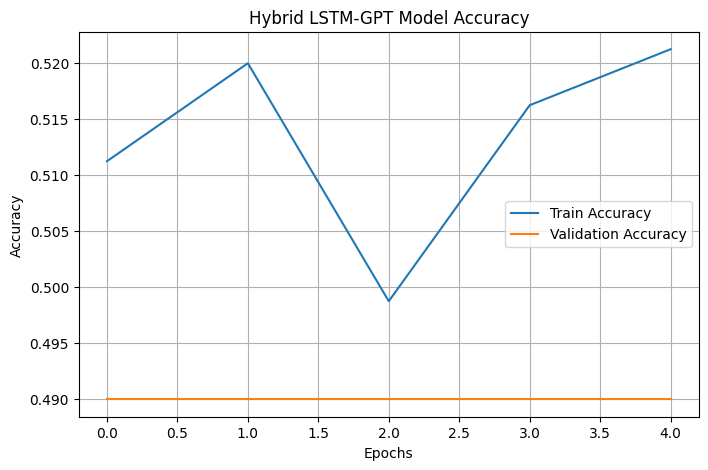

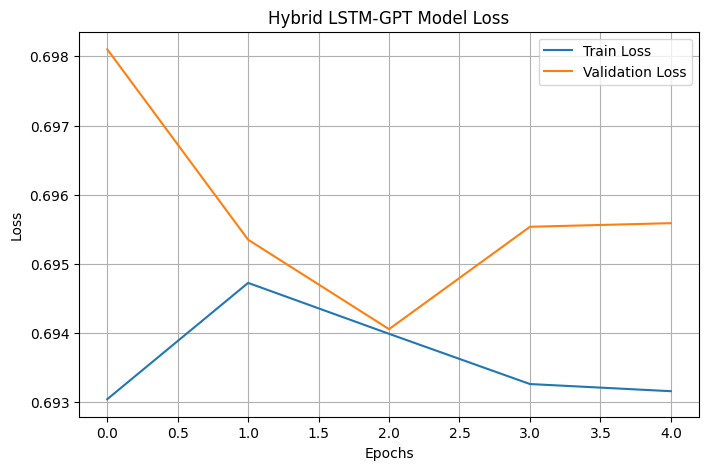

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        98
           1       0.00      0.00      0.00       102

    accuracy                           0.49       200
   macro avg       0.24      0.50      0.33       200
weighted avg       0.24      0.49      0.32       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from transformers import GPT2Tokenizer, TFGPT2Model

# Step 1: Prepare dummy dataset (replace with real dataset)
def load_and_preprocess_data():
    # Generate dummy dataset with 1000 samples and 20 features
    data = np.random.rand(1000, 20)
    labels = np.random.randint(0, 2, size=(1000, 1))  # Binary labels (0 or 1)

    # Normalize features
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, scaler

# Step 2: Build a Hybrid LSTM-GPT Model
def build_hybrid_model(input_shape):
    # GPT-2 tokenizer and model for pre-trained embeddings
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    gpt2_model = TFGPT2Model.from_pretrained("gpt2")

    # Sequential model combining LSTM and GPT-2
    model = Sequential([
        LSTM(50, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(25),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Plot training history for accuracy and loss
def plot_training_history(history, model_type):
    # Plot training and validation accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_type} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_type} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Train Hybrid LSTM-GPT model
def train_hybrid_model():
    X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data()
    input_shape = (X_train.shape[1], 1)

    # Reshape data for RNN
    X_train = X_train.reshape(-1, input_shape[0], input_shape[1])
    X_test = X_test.reshape(-1, input_shape[0], input_shape[1])

    model = build_hybrid_model(input_shape)

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

    # Plot training history
    plot_training_history(history, "Hybrid LSTM-GPT")

    # Evaluate the model
    predictions = (model.predict(X_test) > 0.5).astype(int)
    print(classification_report(y_test, predictions))

    return model, scaler

# Main function
if __name__ == "__main__":
    trained_model, scaler = train_hybrid_model()
